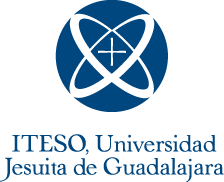

# Proyecto de Simulación Financiera

### Integrantes:
- Sofía Vázquez Guerrero - 739167 - sofia.vazquezg@iteso.mx
- Diego Ruíz González - 739792 - diego.ruiz@iteso.mx
- Michelle Goméz Lopéz - 741902 - michelle.gomez@iteso.mx

### Fecha:
- 08 de mayo del 2023

### Profesor:
- Gabriel Alejandro Morales Ruíz

### Tema:
- Ecuaciones diferenciales, modelo de Black-Scholes.

## Título del proyecto


Modelo de Black-Scholes

## Objetivos

### Objetivo general

- Calcular el precio justo de la opción de compra, así como encontrar la relación entre el precio de la opción de compra y la tasa libre de riesgo.

### Objetivos específicos

- Utilizar las ecuaciones diferenciales para describir la evolución del valor de una opción en cuestión de tiempo, así como la solución de esta ecuación se utiliza para calcular el precio de una opción. 
- Calcular mediante distintas fórmulas el precio justo de la opción de compra para comprender mejor el valor del activo subyacente y su relación con el precio actual, ya que si el precio justo es menor que el precio de mercado, la opción de compra se considera sobrevalorada y puede ser conveniente venderla. De lo contrario, sí el precio justo resulta mayor que el precio de mercado, se considera infravalorada y puede ser una oportunidad de compra.
- Utilizar la herramienta de solución analítica para encontrar la relación entre la tasa libre de riesgo y el precio de la opción de compra.

## Introducción

El modelo de Black-Scholes se utiliza para el cálculo del precio justo o el valor teórico de una opción de compra o de venta. Dicha teoría depende de seis variables, como la volatilidad, el tipo de opción, el precio de la acción subyacente, el tiempo, el precio de ejercicio y la tasa de interés sin riesgo.

Para realizar el cálculo de este modelo se utiliza la siguiente fórmula:

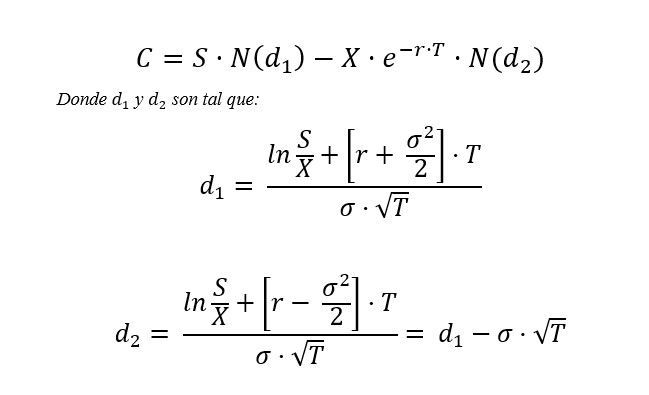

Donde:
- **C** = Precio de compra de la opción.
- **T** = El periodo hasta el vencimiento expresado en años. 
- **r** =  Tasa de interés libre de riesgo.  
- **Sigma (σ)** = volatilidad en tanto por uno.
- **X** = Precio de ejercicio de la opción de compra.
- **S** = Precio de la acción.
- **N(d1 y d2)** = Valor de la función de probabilidad acumulada de una distribución normal.

El cálculo del precio justo de una opción es fundamental para los inversores para ayudarlos a tomar decisiones sobre la compra o venta de opciones de compra en el mercado. Así mismo, es útil para comprender la relación entre el precio actual del activo y el valor subyacente de la opción de compra. 


Por otra parte, la simulación del valor de la acción esperada es una herramienta eficaz para comprender el comportamiento de una acción en un futuro y así tomar mejores decisiones sobre la compra o venta de dichos instrumentos. 

## Modelo que representa el problema y planteamiento

El precio actual de una acción es de 40 usd. Tiene un rendimiento del 13% con una volatilidad del 23%. 
- ¿Cuál es el precio justo de la opción de compra teniendo un precio de ejercicio de 42 usd? 
- ¿Cuál es su valor de la acción esperado dentro de 6 meses?
- ¿Cómo afecta la tasa libre de riesgo en el precio?

## Solución y visualización

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.integrate import solve_ivp, odeint

In [14]:
s = 40
u = 0.13
o = 0.23
k = 42
t = 0.5

# Solución numérica

# A)

#### N(D2) ME DICE LA PROBABILIDAD DE QUE SE EJERZA UN CALL

In [15]:
import numpy as np
import math
d2 = (math.log((s/k)+((u-((o**2)/2))*t))/(o*np.sqrt(t)))
d2

0.025500977602697286

In [16]:
from scipy.stats import norm
mediad2 = 0
desviacion_estandard2 = 1
Probad2 = norm.cdf(d2, mediad2, desviacion_estandard2)*100
Probad2

51.017231563610174

# B)

#### VALOR ESPERADO EN 6 MESES

In [17]:
import math
d1 = (math.log((s/k)+((u+((o**2)/2))*t))/(o*np.sqrt(t)))
d1

0.18536609071355586

In [18]:
mediad1 = 0
desviacion_estandard1 = 1
Probad1 = norm.cdf(d1, mediad1, desviacion_estandard1)*100
Probad1

57.35290484108377

# C)

#### PRECIO JUSTO DE UNA OPCIÓN DE COMPRA

In [19]:
Call = (s*d1)-(k*np.exp(-u*t)*d2)
Call

6.411005899918487

# Solución analítica

In [61]:
from scipy.integrate import solve_ivp, odeint
import numpy as np
import matplotlib.pyplot as plt

In [60]:
def black_scholes(S, K, T, r, sigma):
    d1 = (np.log(s/k) + (u + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(T)
    N1 = norm.cdf(d1)
    N2 = norm.cdf(d2)
    precio_de_compra = s * N1 - k * np.exp(-r * t) * N2
    return precio_de_compra

In [62]:
#Parámetros
s = 40 # precio subyacente
u = 0.13 # tasa libre de riesgo
o = 0.23 # volatilidad; sigma
k = 42 # precio de ejercicio
t = 0.5 # tiempo de vencimiento (en años)

In [63]:
d1

0.18536609071355586

In [64]:
d2

0.025500977602697286

In [66]:
N1 = norm.cdf(0.185366)
N1

0.5735290128378

In [67]:
N2 = norm.cdf(0.02550097)
N2

0.5101723126040505

In [68]:
precio_de_compra

2.9058902532278204

In [57]:
# Solución analítica para distintos valores de r
r_lista = np.linspace(0, 0.23, 11)
precio_de_compras = []

In [58]:
for r in r_lista:
    precio_de_compra = black_scholes(s, k, t, u, o)
    precio_de_compras.append(precio_de_compra)

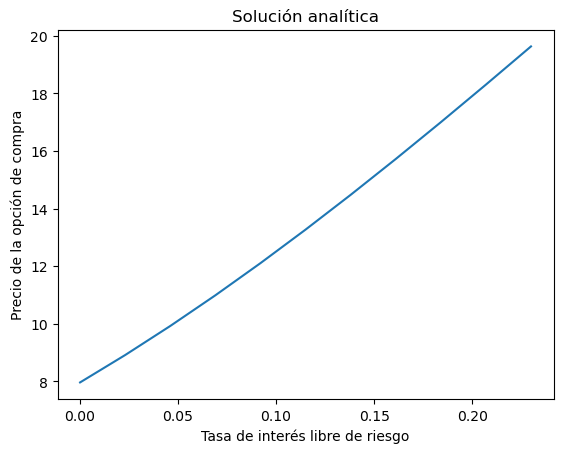

In [59]:
# Gráfica
plt.plot(r_lista, call_prices)
plt.xlabel('Tasa de interés libre de riesgo')
plt.ylabel('Precio de la opción de compra')
plt.title('Solución analítica')
plt.show()

Se puede observar la relación que existe entre el precio de una opción de compra y la tasa libre de riesgo. Se puede observar que a medida que la tasa incrementa, el precio de la opción de compra también aumenta. Esto quiere decir que al tener una tasa libre de riesgo más alta, significa que invertir no es la mejor decisión, ya que esto hace que el precio de la opción sea mayor. En pocas palabras, el precio de la opción de compra aumenta a medida que aumenta la tasa libre de riesgo, y este a su vez afecta directamente el precio.

## Conclusiones

- Este modelo y ecuación suele ser difícil y complejo de resolver, mediante este programa su solución es es más sencillo y nos evitamos realizar el calculo por nuestra cuenta. 
- Pudimos calcular el precio justo y simular el precio esperado en 6 meses con éxito; analizamos el resultado que nos arrojo y  nos dimos cuenta qua a medida que la tasa incrementa al mismo tiempo aumenta el precio de compra de la opción y asumimos que invertir en esta opción no es conveniente.

## Referencias

- Teoría de Black-Scholes. (s/f). Estrategias de inversión. Recuperado el 1 de mayo de 2023, de https://www.estrategiasdeinversion.com/herramientas/diccionario/trading/teoria-de-black-scholes-t-1026.
- López, J. F. (2017, diciembre 9). Modelo Black-Scholes. Economipedia. https://economipedia.com/definiciones/modelo-black-scholes.html
- Danae, M. E., Ávila, D., César, L., Millán, G., Licenciado, D., Aplicadas, M., & Hidalgo, P. (s/f). Modelo Black-Scholes-Merton, para la toma de decisiones financieras. Edu.mx. Recuperado el 8 de mayo de 2023, de https://www.uaeh.edu.mx/investigacion/icea/LI_EcoReg/Danae_Duana/modelo.pdf